## Objectives
1. How to define your problem
2. How to choose properate models
3. How to evaluate the model performance
4. How to publish your model

### We are not going to cover
1. classification problem
2. deep learning models

In [9]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

## Overview Machine Learning
<img src="../images/AI_ML_DL.png" alt="Drawing" align="center" style="width: 300px;"/>

## General protocol for classical Machine Learning analysis
### 1. Define your problem
<img src="../images/define_problem.png" alt="Drawing" align="center" style="width: 500px;"/>

#### Problem: We would like to predict the optimal growth temperature of micro-organisms. This is a regression problem

### 2. Choose models
<img src="../images/define_models.png" alt="Drawing" align="center" style="width: 800px;"/>
Yang, K. K., Wu, Z., & Arnold, F. H. (2018). Machine learning-guided directed evolution for protein engineering. Nature Methods. https://doi.org/10.1038/s41592-019-0496-6

#### We have ~5,000 samples. We will start with linear regression and then go for other classical models, like SVM and Random forest

### 3. Do machine learning
<img src="../images/protocol.png" alt="Drawing" align="center" style="width: 800px;"/>

### 3.1 Feature engineering
Feature engineering is critical for machine learning analysis, especially for classical models. This step is where you can incorporate your domain knowledge.

#### We choose to extract k-mer features from all proteins sequences in a microorganism. The simplest k-mer features are amino-acid frequencies

In [10]:
data = pd.read_csv('../data/AA_classified_2nd_with_head_AAcount.csv',index_col=0)
data.head(n=10)

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,Y,OGT
37_allobaculum_stercoricanis_bacteria,38750.0,7190.0,31307.0,36813.0,22821.0,33339.0,11305.0,39487.0,34854.0,50619.0,...,25891.0,19145.0,24214.0,21014.0,31577.0,28307.0,35229.0,5148.0,20247.0,37.0
28_shewanella_algae_bacteria,436013.0,49072.0,235432.0,265441.0,165570.0,318794.0,93876.0,220458.0,197746.0,525289.0,...,156265.0,190917.0,234489.0,227744.0,290225.0,202503.0,266166.0,62632.0,129478.0,28.0
37_bifidobacterium_saguini_bacteria,89539.0,7428.0,51927.0,46275.0,27916.0,63357.0,17595.0,44947.0,33877.0,71071.0,...,30201.0,37074.0,29780.0,44294.0,50705.0,51519.0,60905.0,11875.0,23193.0,37.0
28_ochrobactrum_rhizosphaerae_bacteria,154306.0,10566.0,78512.0,82184.0,54787.0,112179.0,27803.0,83711.0,58246.0,136657.0,...,44600.0,64652.0,45327.0,87673.0,82558.0,73821.0,100242.0,17576.0,33072.0,28.0
30_sphingomonas_haloaromaticamans_bacteria,151083.0,7574.0,64544.0,54968.0,36172.0,97881.0,20993.0,53451.0,26873.0,103804.0,...,25073.0,58491.0,30154.0,82485.0,51550.0,53158.0,72579.0,15351.0,22882.0,30.0
28_kurthia_massiliensis_bacteria,76441.0,6307.0,49673.0,61828.0,38868.0,57876.0,20555.0,65634.0,57999.0,84392.0,...,36441.0,31300.0,38976.0,36847.0,47612.0,57655.0,66915.0,8171.0,33538.0,28.0
30_bacillus_ligniniphilus_bacteria,75058.0,7160.0,49107.0,81257.0,44770.0,71396.0,22216.0,75131.0,63834.0,100453.0,...,39681.0,37836.0,40195.0,45906.0,58012.0,54395.0,74244.0,9989.0,33061.0,30.0
29_planococcus_maritimus_bacteria,79075.0,5191.0,50060.0,73700.0,41544.0,67676.0,19521.0,64184.0,52394.0,92109.0,...,33103.0,35069.0,36361.0,41418.0,54500.0,49898.0,65864.0,9546.0,29886.0,29.0
37_collinsella_aerofaciens_bacteria,83598.0,11459.0,47019.0,46939.0,25342.0,60926.0,15549.0,37363.0,29188.0,66406.0,...,22112.0,30295.0,22181.0,45509.0,41081.0,39455.0,58084.0,7236.0,19593.0,37.0
20_planococcus_halocryophilus_bacteria,75233.0,5573.0,50256.0,74330.0,44149.0,67397.0,19356.0,72069.0,60390.0,94730.0,...,38516.0,34989.0,36709.0,38661.0,58223.0,54381.0,69203.0,9727.0,31501.0,20.0


#### Calculate amino acid frequencies for each organism

In [11]:
def cal_aa_fq(data):
    # data is a dataframe with organism names as index and 20 amino acid counts as columns. 
    # The last column is OGT
    #
    data_fq = data.copy()
    X = data.values[:,:-1]
    Xfq = np.divide(X,np.sum(X,axis=1).reshape((-1,1)))
    data_fq.loc[:,data.columns[:-1]] = Xfq
    return data_fq

In [12]:
data_fq = cal_aa_fq(data)

In [13]:
data_fq.head(n=10)

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,Y,OGT
37_allobaculum_stercoricanis_bacteria,0.072690,0.013487,0.058728,0.069056,0.042809,0.062539,0.021207,0.074072,0.065381,0.094954,...,0.048568,0.035913,0.045422,0.039419,0.059234,0.053100,0.066085,0.009657,0.037981,37.0
28_shewanella_algae_bacteria,0.099732,0.011225,0.053852,0.060716,0.037872,0.072920,0.021473,0.050427,0.045232,0.120152,...,0.035743,0.043670,0.053636,0.052093,0.066385,0.046320,0.060882,0.014326,0.029616,28.0
37_bifidobacterium_saguini_bacteria,0.109933,0.009120,0.063754,0.056815,0.034274,0.077788,0.021603,0.055185,0.041593,0.087259,...,0.037080,0.045518,0.036563,0.054383,0.062254,0.063253,0.074777,0.014580,0.028476,37.0
28_ochrobactrum_rhizosphaerae_bacteria,0.111494,0.007634,0.056729,0.059382,0.039586,0.081055,0.020089,0.060486,0.042086,0.098742,...,0.032226,0.046714,0.032751,0.063348,0.059652,0.053340,0.072430,0.012700,0.023896,28.0
30_sphingomonas_haloaromaticamans_bacteria,0.143492,0.007193,0.061301,0.052206,0.034355,0.092963,0.019938,0.050765,0.025523,0.098588,...,0.023813,0.055552,0.028639,0.078341,0.048960,0.050487,0.068932,0.014580,0.021732,30.0
28_kurthia_massiliensis_bacteria,0.084591,0.006979,0.054969,0.068420,0.043012,0.064047,0.022747,0.072632,0.064183,0.093390,...,0.040326,0.034637,0.043132,0.040776,0.052688,0.063802,0.074049,0.009042,0.037114,28.0
30_bacillus_ligniniphilus_bacteria,0.074185,0.007077,0.048536,0.080312,0.044249,0.070565,0.021958,0.074257,0.063091,0.099284,...,0.039219,0.037396,0.039727,0.045372,0.057337,0.053762,0.073380,0.009873,0.032676,30.0
29_planococcus_maritimus_bacteria,0.085203,0.005593,0.053940,0.079412,0.044764,0.072921,0.021034,0.069158,0.056455,0.099247,...,0.035668,0.037787,0.039179,0.044628,0.058724,0.053765,0.070968,0.010286,0.032202,29.0
37_collinsella_aerofaciens_bacteria,0.114713,0.015724,0.064520,0.064410,0.034774,0.083603,0.021336,0.051270,0.040052,0.091123,...,0.030342,0.041571,0.030437,0.062448,0.056371,0.054140,0.079703,0.009929,0.026886,37.0
20_planococcus_halocryophilus_bacteria,0.078087,0.005784,0.052163,0.077150,0.045824,0.069954,0.020090,0.074803,0.062681,0.098324,...,0.039977,0.036316,0.038102,0.040128,0.060432,0.056444,0.071828,0.010096,0.032696,20.0


#### Have a look at your dataset

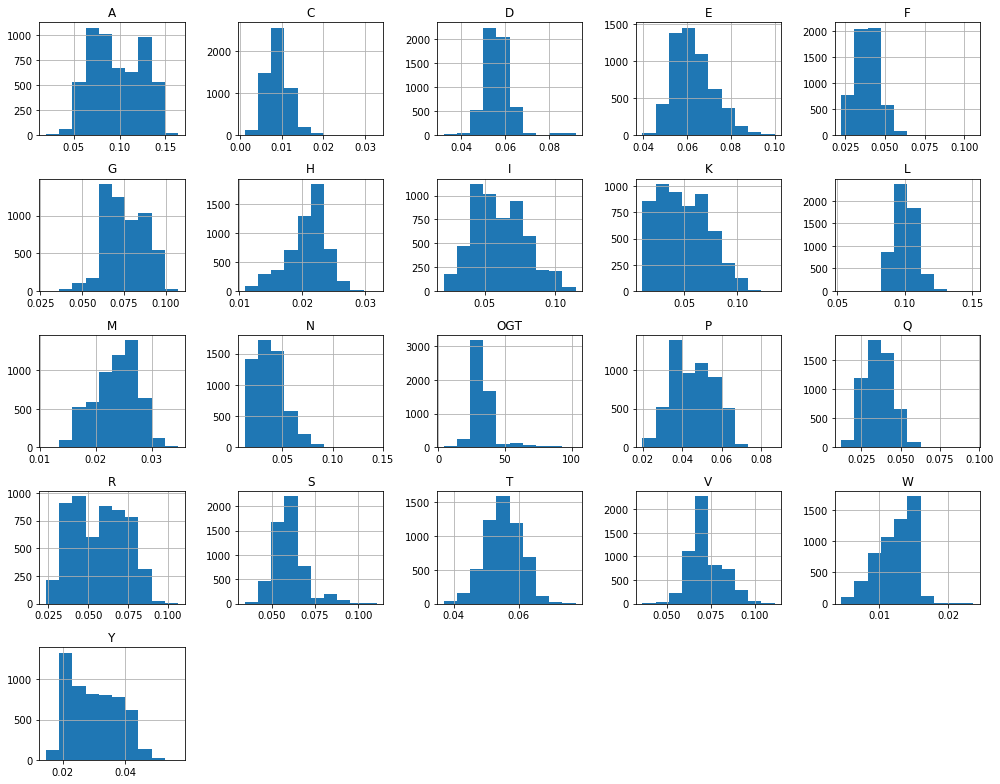

In [14]:
pd.DataFrame.hist(data_fq,bins=10,figsize=(14,11))
plt.tight_layout()
plt.show()

### 3.2 Normalization
This step is to ensure that all features values are in a similar scale. There are many ways to normalize the data, like $x_i=\frac{x_i-x_{min}}{x_{max}-x_{min}}$, $x_i=\frac{x_i-\bar{x}}{\sigma}$ and many more.  
  
Important: Do normalization for each feature. 
Usually it's not necessary to normalized target values.

In [15]:
def normalize(X):
    X_n = np.zeros_like(X)
    k = 0
    for i in range(X.shape[1]):
        x = X[:,i]
        if np.var(x) == 0: continue
        X_n[:,k] = (x-np.mean(x))/np.var(x)**0.5
        k+=1
    return np.around(X_n, decimals=3)

In [16]:
X = data_fq.values[:,:-1]
y = data_fq.values[:,-1]
print(X.shape,y.shape)

(5533, 20) (5533,)


#### It would be very slow to run analysis on such a big dataset. For this tutorial, we are going to use 100 samples from this dataset.

In [51]:
random.seed(1)
sel_samples = random.sample(range(X.shape[0]),100)
X_small = X[sel_samples,:]
y_small = y[sel_samples]
print(X_small.shape,y_small.shape)

(100, 20) (100,)


### 3.3 Model evaluation
* Two-level cross-validation  
or  
* Split dataset into train, validation, test datasets

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression as LR
from sklearn import svm
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from multiprocessing import cpu_count

In [53]:
def do_cross_validation(X,y,model,n_jobs=-1):
    scores = cross_val_score(model,X,y,scoring='r2',cv=5,n_jobs=n_jobs)
    return [np.mean(scores),np.std(scores)]

In [54]:
def lr():
    return LR()

In [55]:
def elastic_net():
    return ElasticNetCV(n_jobs=-1,cv=3)

In [56]:
def bayesridge():
    parameters = {
        'alpha_1': [1e-1,1e-5,1e-6,1e-8],
        'alpha_2': [1e-1,1e-5,1e-6,1e-8],
        'lambda_1': [1e-1,1e-5,1e-6,1e-8],
        'lambda_2': [1e-1,1e-5,1e-6,1e-8],
    } # 
    model = GridSearchCV(BayesianRidge(),parameters,n_jobs=-1,cv=3)
    return model

In [57]:
def svr():
    parameters={
                'C':np.logspace(-5,10,num=16,base=2.0),
                'epsilon':[0,0.01,0.1,0.5,1.0,2.0,4.0]
                }
    svr = svm.SVR(kernel='rbf')
    model = GridSearchCV(svr,parameters,n_jobs=-1,cv=3)
    return model

In [58]:
def random_forest():
    # You can choose as many trees as you can, depending on your computational power. Usually 1000 would be a 
    # reasonable choice. This also depend on the complexity of your problem. 
    # 
    parameters = {
                    'max_features':np.arange(0.1,1.1,0.1)
    }
    rf = RandomForestRegressor(n_estimators=100,verbose =1,n_jobs=-1)
    model=GridSearchCV(rf,parameters,n_jobs=1,cv=3)
    return model

In [ ]:
models = {'Linear':lr(),
         'ElasticNetCV':elastic_net(),
         'BayesianRidge':bayesridge(),
         'SVR':svr(),
         'RandomForestRegressor':random_forest()}
model_names = list(models.keys())
R2s = list()
for name in model_names: R2s.append(do_cross_validation(X_small,y_small,models[name],n_jobs=-1))
R2s = np.array(R2s)

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(np.arange(len(models)),R2s[:,0],yerr=R2s[:,1])
plt.tight_layout()
plt.xticks(np.arange(len(models)),model_names)
plt.ylabel('$R^2$ (5-fold cross-validation)')
plt.show()